     Density Line
0  71.624345    A
1  69.388244    A
2  69.471828    A
3  68.927031    A
4  70.865408    A (50, 2)


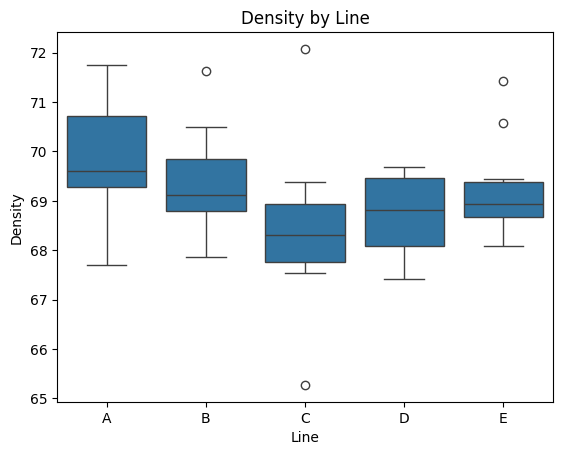

各ライン平均:
 Line
A    69.902859
B    69.368650
C    68.429044
D    68.738097
E    69.233799
Name: Density, dtype: float64
全体平均: 69.13448967999292
効果SS=13.098668335875418, 誤差SS=67.4069531127807
効果df=4, 誤差df=45
効果MS=3.2746670839688545, 誤差MS=1.4979322913951267
F比=2.1861249021602527, p値=0.08574964851206872

ANOVA (statsmodels):
              sum_sq    df         F   PR(>F)
C(Line)   13.098668   4.0  2.186125  0.08575
Residual  67.406953  45.0       NaN      NaN

判定: 帰無仮説を棄却しない（差なし）


In [1]:
# 最低限必要なライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1) データ読み込み＆確認
df = pd.read_csv("ethanol_data.csv")
print(df.head(), df.shape)

# 2) 箱ひげ図（横軸：製造ライン、縦軸：濃度）
sns.boxplot(x="Line", y="Density", data=df)
plt.title("Density by Line")
plt.show()

# 3) 各ライン平均＆全体平均
group_means = df.groupby("Line")["Density"].mean()
grand_mean  = df["Density"].mean()
print("各ライン平均:\n", group_means)
print("全体平均:", grand_mean)

# 4) 一元分散分析の手計算（平方和・自由度・分散・F・p）
k = df["Line"].nunique()     # 群数
N = len(df)                  # 総サンプル数

SST = ((df["Density"] - grand_mean) ** 2).sum()  # 全体平方和
SSB = (df.groupby("Line").size() * (group_means - grand_mean) ** 2).sum()  # 効果（群間）平方和
SSW = SST - SSB                                   # 誤差（群内）平方和

df_effect = k - 1
df_error  = N - k

MS_effect = SSB / df_effect   # 効果の分散
MS_error  = SSW / df_error    # 誤差の分散

F_stat = MS_effect / MS_error
p_value = f.sf(F_stat, df_effect, df_error)

print(f"効果SS={SSB}, 誤差SS={SSW}")
print(f"効果df={df_effect}, 誤差df={df_error}")
print(f"効果MS={MS_effect}, 誤差MS={MS_error}")
print(f"F比={F_stat}, p値={p_value}")

# 5) statsmodels で一元分散分析（検算）
model = ols("Density ~ C(Line)", data=df).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)  # typ=2で十分
print("\nANOVA (statsmodels):\n", anova_tbl)

# 6) 判定（有意水準5%）
alpha = 0.05
print("\n判定:", "帰無仮説を棄却（差あり）" if p_value < alpha else "帰無仮説を棄却しない（差なし）")
